# Importing Packages 

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, explained_variance_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

# Understanding the data

In [2]:
df = pd.read_csv(r'C:\Users\nikeshv\Downloads\train.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
#changing columns and rows width for displaying max columns
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns',500)
pd.set_option('display.width',1000)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [6]:
df.shape

(1460, 81)

# Data Cleaning

In [7]:
#checking the missing values in the dataframe
df.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [8]:
#checking the percentage of missing values 
round(df.isnull().sum()/len(df.index)*100,2)

Id                0.00
MSSubClass        0.00
MSZoning          0.00
LotFrontage      17.74
LotArea           0.00
Street            0.00
Alley            93.77
LotShape          0.00
LandContour       0.00
Utilities         0.00
LotConfig         0.00
LandSlope         0.00
Neighborhood      0.00
Condition1        0.00
Condition2        0.00
BldgType          0.00
HouseStyle        0.00
OverallQual       0.00
OverallCond       0.00
YearBuilt         0.00
YearRemodAdd      0.00
RoofStyle         0.00
RoofMatl          0.00
Exterior1st       0.00
Exterior2nd       0.00
MasVnrType        0.55
MasVnrArea        0.55
ExterQual         0.00
ExterCond         0.00
Foundation        0.00
BsmtQual          2.53
BsmtCond          2.53
BsmtExposure      2.60
BsmtFinType1      2.53
BsmtFinSF1        0.00
BsmtFinType2      2.60
BsmtFinSF2        0.00
BsmtUnfSF         0.00
TotalBsmtSF       0.00
Heating           0.00
HeatingQC         0.00
CentralAir        0.00
Electrical        0.07
1stFlrSF   

In [9]:
#Dropping variables having missing values/NAN morethan 40% 
df = df.drop(['Id','Alley','FireplaceQu','PoolQC','Fence','MiscFeature'],axis=1)

In [10]:
#rechecking the missing values after dropping
round(df.isnull().sum()/len(df.index)*100,2)

MSSubClass        0.00
MSZoning          0.00
LotFrontage      17.74
LotArea           0.00
Street            0.00
LotShape          0.00
LandContour       0.00
Utilities         0.00
LotConfig         0.00
LandSlope         0.00
Neighborhood      0.00
Condition1        0.00
Condition2        0.00
BldgType          0.00
HouseStyle        0.00
OverallQual       0.00
OverallCond       0.00
YearBuilt         0.00
YearRemodAdd      0.00
RoofStyle         0.00
RoofMatl          0.00
Exterior1st       0.00
Exterior2nd       0.00
MasVnrType        0.55
MasVnrArea        0.55
ExterQual         0.00
ExterCond         0.00
Foundation        0.00
BsmtQual          2.53
BsmtCond          2.53
BsmtExposure      2.60
BsmtFinType1      2.53
BsmtFinSF1        0.00
BsmtFinType2      2.60
BsmtFinSF2        0.00
BsmtUnfSF         0.00
TotalBsmtSF       0.00
Heating           0.00
HeatingQC         0.00
CentralAir        0.00
Electrical        0.07
1stFlrSF          0.00
2ndFlrSF          0.00
LowQualFinS

In [11]:
#Imputing column missing values 
df.loc[:,df.isnull().any()].columns

Index(['LotFrontage', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond'], dtype='object')

In [12]:
#Imputing missing values for rows
df.dropna(axis='rows').head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000


In [13]:
#Imputig missing values with mean/mode 
df['LotFrontage'] = df['LotFrontage'].fillna(df['LotFrontage'].mean())
df['MasVnrType'] =  df['MasVnrType'].fillna(df['MasVnrType'].mode()[0])
df['MasVnrArea'] = df['MasVnrArea'].fillna(df['MasVnrArea'].mode()[0])
df['BsmtQual'] = df['BsmtQual'].fillna(df['BsmtQual'].mode()[0])
df['BsmtCond'] = df['BsmtCond'].fillna(df['BsmtCond'].mode()[0])
df['BsmtExposure'] = df['BsmtExposure'].fillna(df['BsmtExposure'].mode()[0])
df['BsmtFinType1'] = df['BsmtFinType1'].fillna(df['BsmtFinType1'].mode()[0])
df['BsmtFinType2'] = df['BsmtFinType2'].fillna(df['BsmtFinType2'].mode()[0])
df['Electrical'] = df['Electrical'].fillna(df['Electrical'].mode()[0])
df['GarageType'] = df['GarageType'].fillna(df['GarageType'].mode()[0])
df['GarageYrBlt'] = df['GarageYrBlt'].fillna(df['GarageYrBlt'].mode()[0])
df['GarageFinish'] = df['GarageFinish'].fillna(df['GarageFinish'].mode()[0])
df['GarageQual'] = df['GarageQual'].fillna(df['GarageQual'].mode()[0])
df['GarageCond'] = df['GarageCond'].fillna(df['GarageCond'].mode()[0])

In [14]:
#rechecking the dataset for missing values
df.isnull().values.any()

False

In [15]:
#After imputing shape of the dataframe
df.shape

(1460, 75)

In [16]:
#Extracting Numerical Columns from the data frame
df_num = df.select_dtypes(include=['int64', 'float64'])
display(df_num.head(3))
print('\n')
display(df_num.columns.values)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,223500


array(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'], dtype=object)

In [17]:
#Extracting categorical columns from the dataframe
df_cat = df.select_dtypes(include=['object']).columns
df_cat

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition'], dtype='object')

# Univariate Analysis

## Numerical Analysis

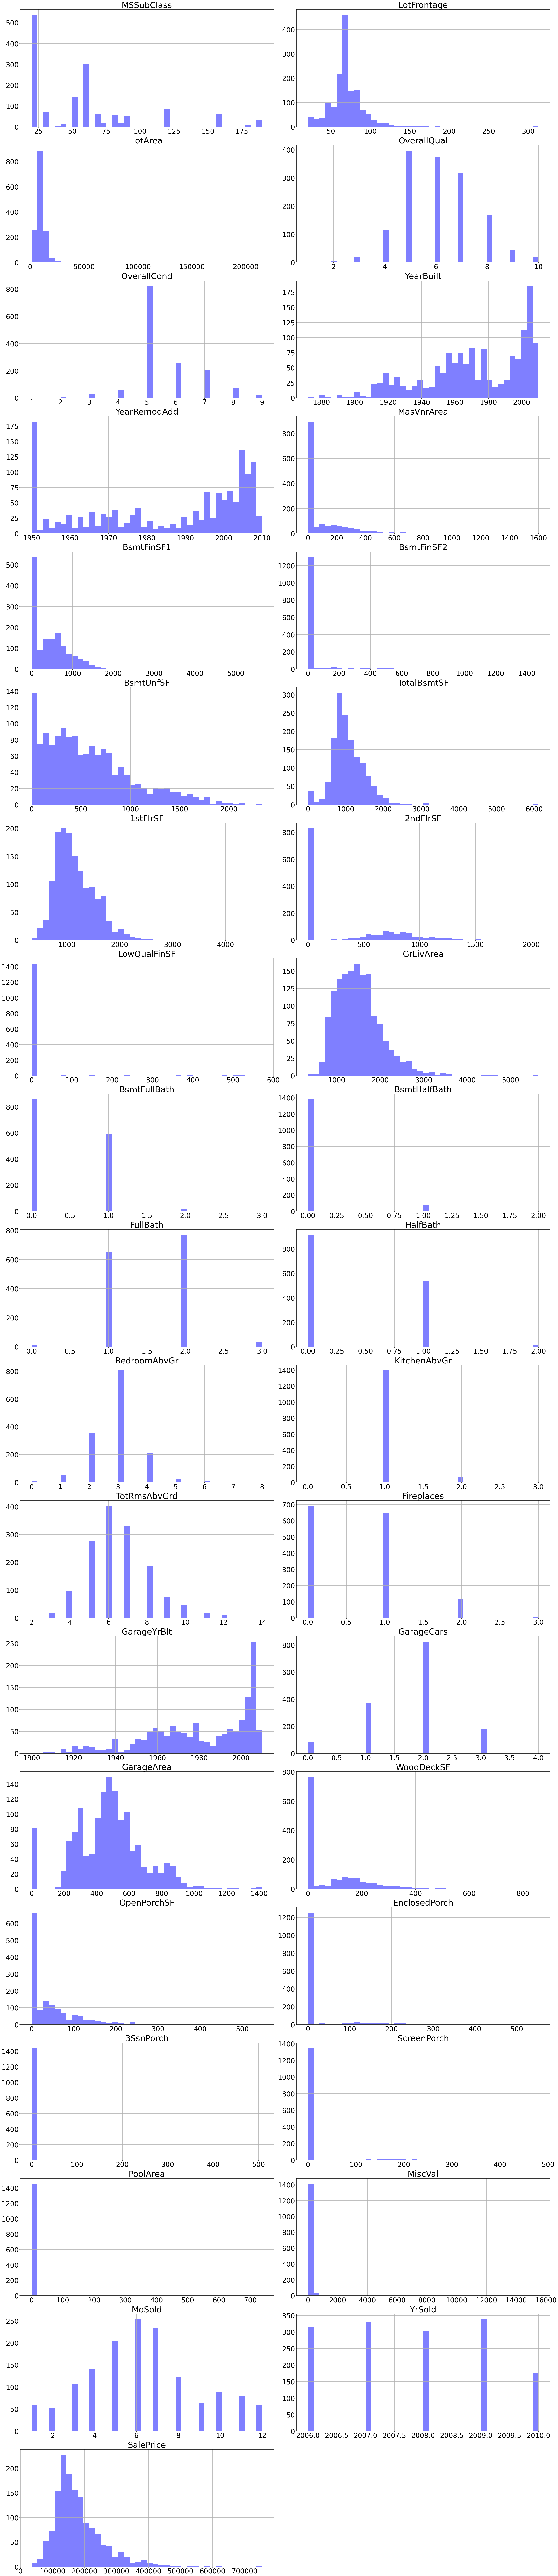

In [18]:
#histplot for numerical columns
def draw_histograms(df, variables, n_rows, n_cols):
    fig=plt.figure()
    for i, var_name in enumerate(variables):
        ax=fig.add_subplot(n_rows,n_cols,i+1)
        df[var_name].hist(bins=40,ax=ax,color = 'blue',alpha=0.5, figsize = (40, 200))
        ax.set_title(var_name, fontsize = 43)
        ax.tick_params(axis = 'both', which = 'major', labelsize = 35)
        ax.tick_params(axis = 'both', which = 'minor', labelsize = 35)
        ax.set_xlabel('')
    fig.tight_layout(rect = [0, 0.03, 1, 0.95])  # Improves appearance a bit.
    plt.show()
    
draw_histograms(df_num, df_num.columns, 19, 2)

## Insights:
    - Two types of numerical data present in the given data frame Discrete and Continuous
    - continuous variables in this data frame are like LotFrontAge, LotArea, and YearBuilt
    - Discrete variables in this data frame are like MSSubclass,OverallQual,OverallCond,HalfBatth etc.
    - And few of them are categorical variables like MSSubClass, OverallQual, and OverallCond

In [19]:
#Converting few of the discrete variables into categorical variables
df.loc[:,['MSSubClass', 'OverallQual', 'OverallCond', 'MoSold', 'YrSold']] = df.loc[:,['MSSubClass', 'OverallQual', 'OverallCond', 'MoSold', 'YrSold']].astype('object')

In [20]:
#check out the data type after correction
df.dtypes.value_counts()

object     43
int64      29
float64     3
dtype: int64

## Categorical Analysis

Mszoning


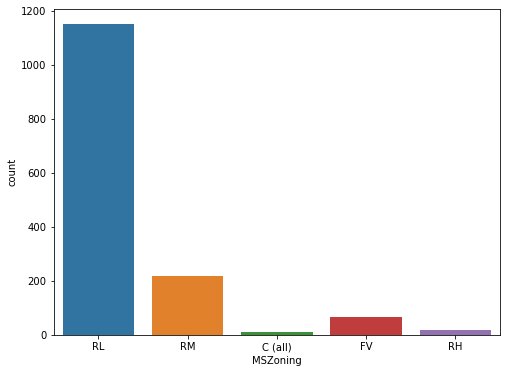

Street


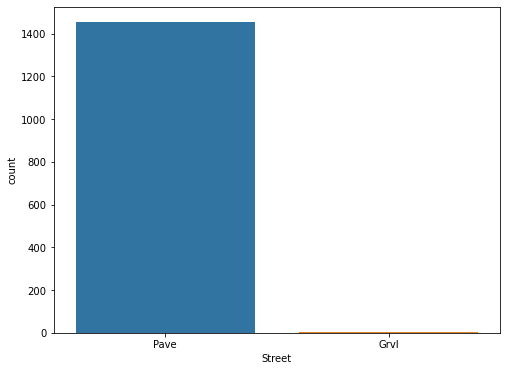

Lotshape


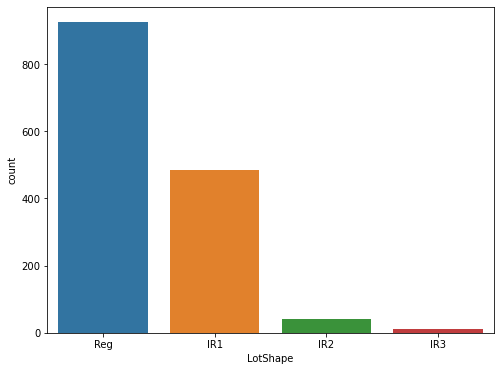

Landcontour


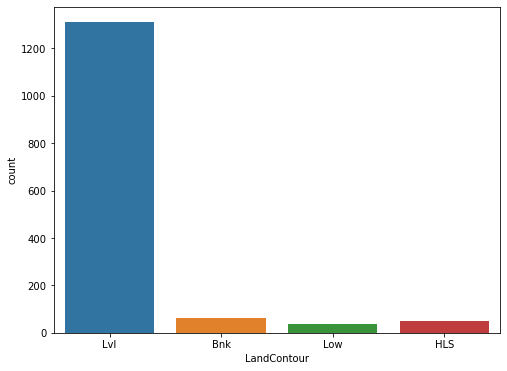

Utilities


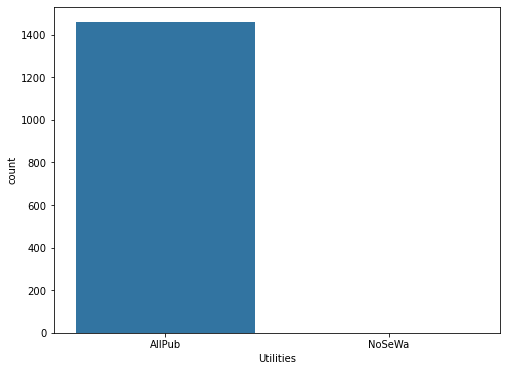

Lotconfig


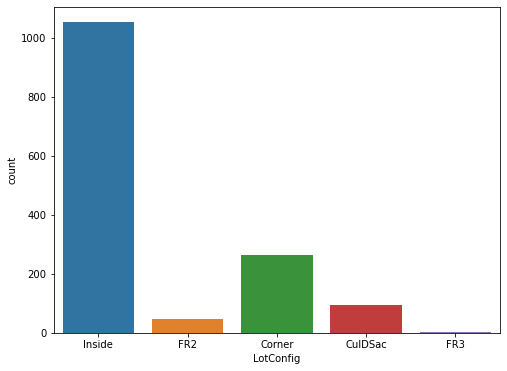

Landslope


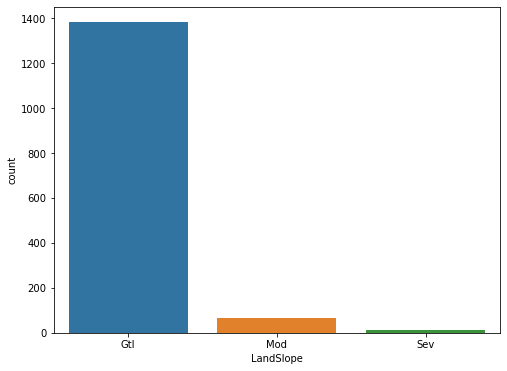

Neighborhood


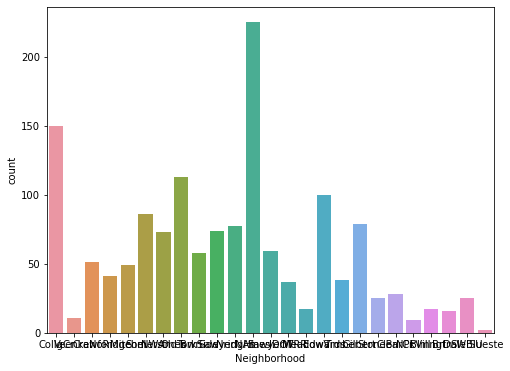

Condition1


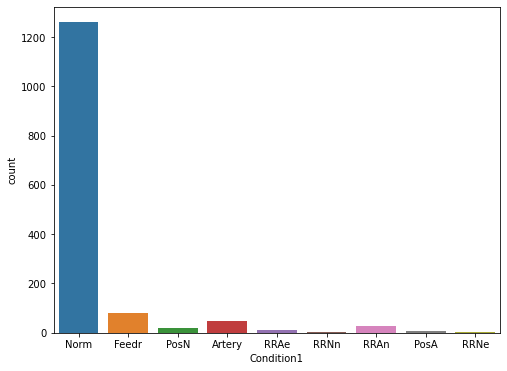

Condition2


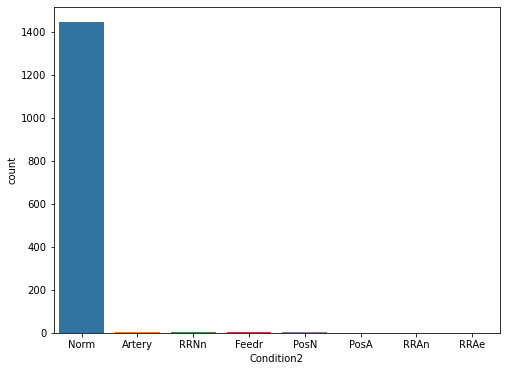

Bldgtype


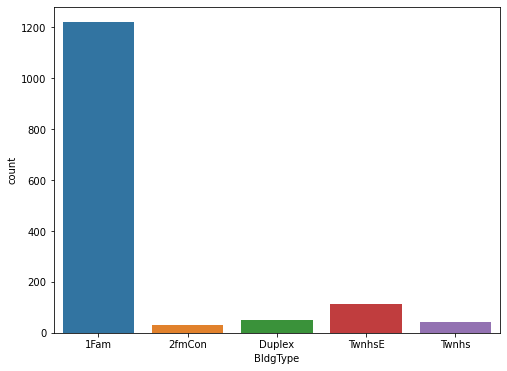

Housestyle


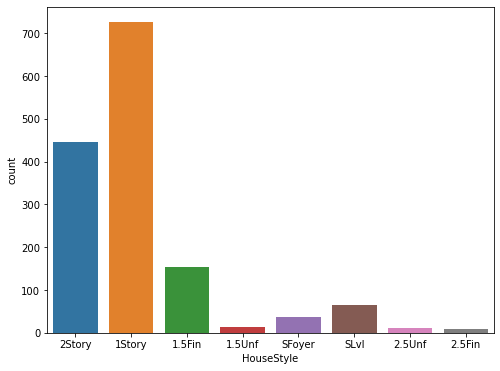

Roofstyle


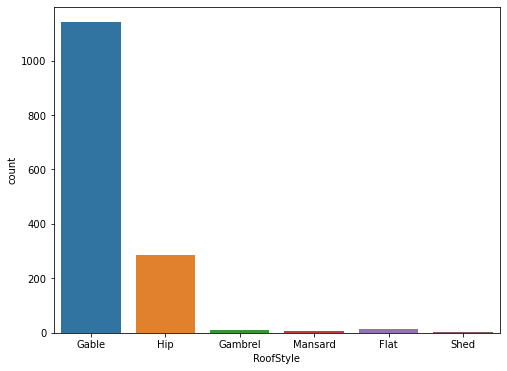

Roofmatl


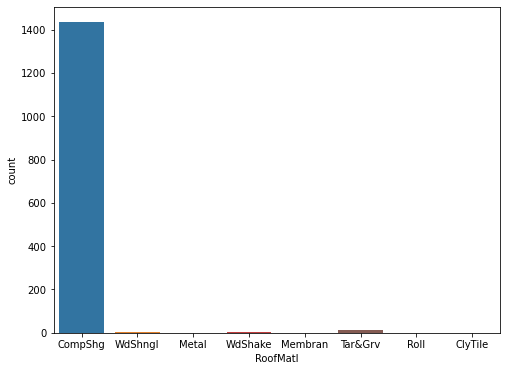

Exterior1St


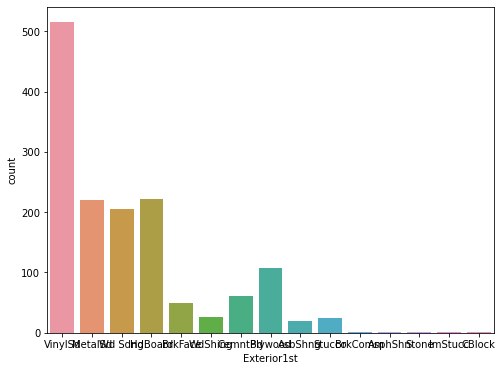

Exterior2Nd


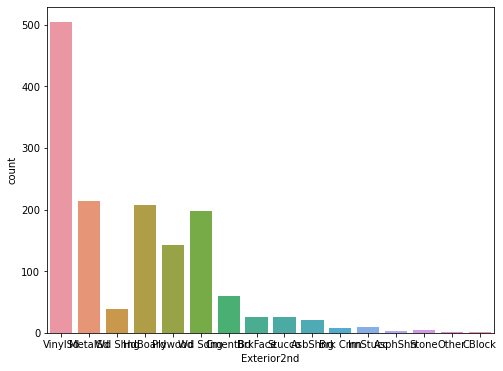

Masvnrtype


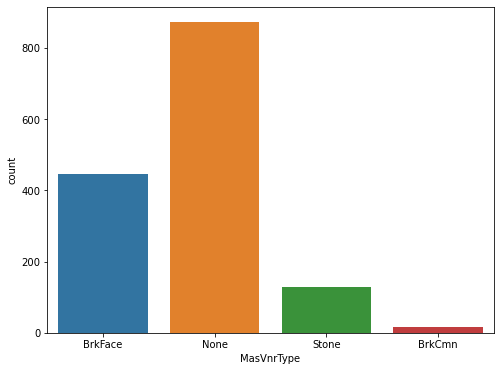

Exterqual


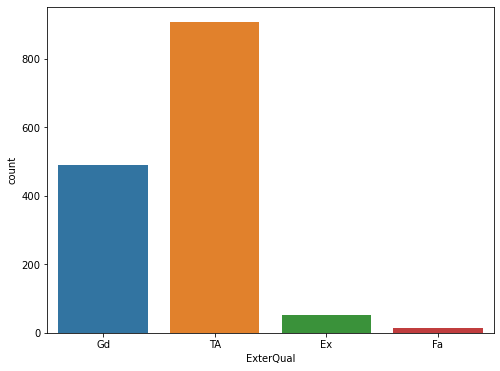

Extercond


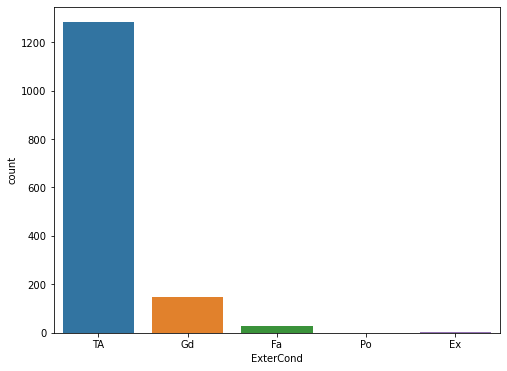

Foundation


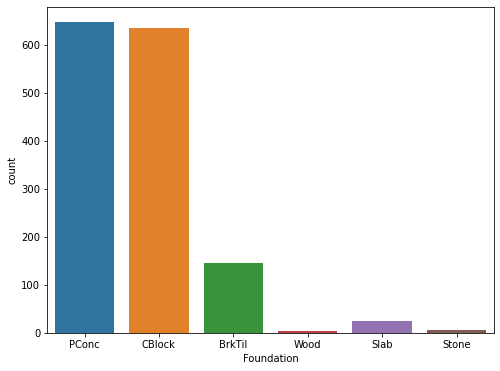

Bsmtqual


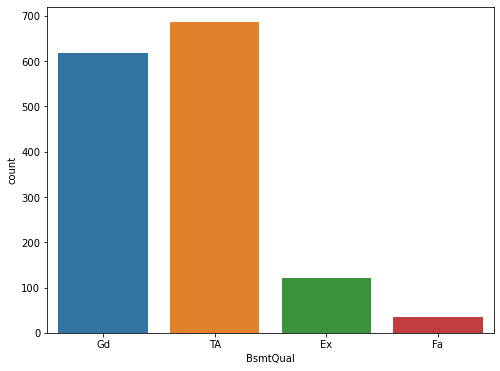

Bsmtcond


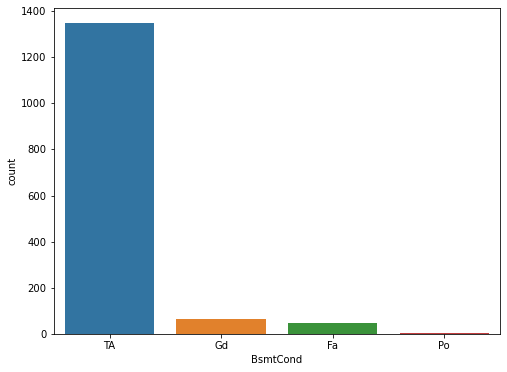

Bsmtexposure


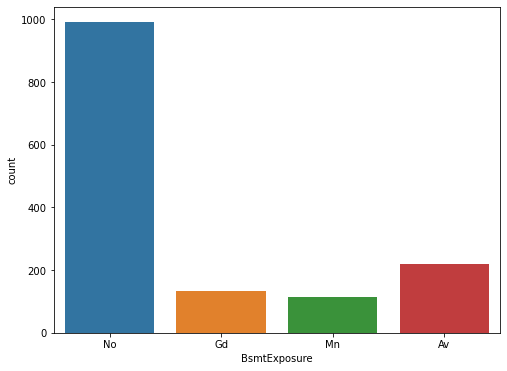

Bsmtfintype1


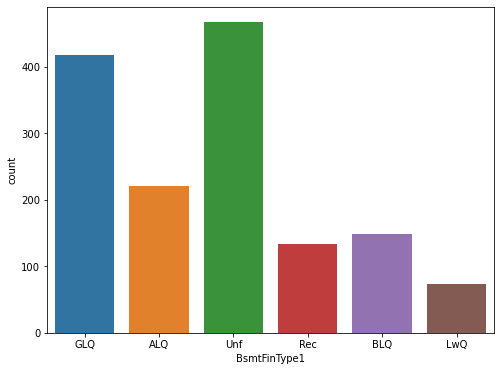

Bsmtfintype2


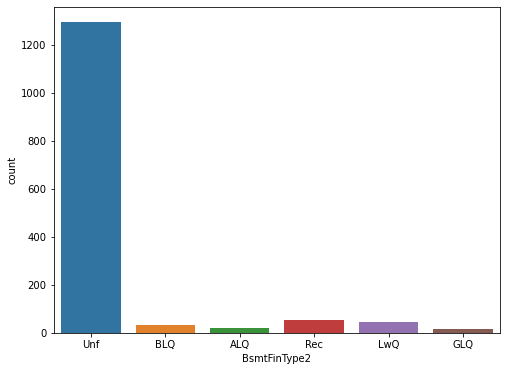

Heating


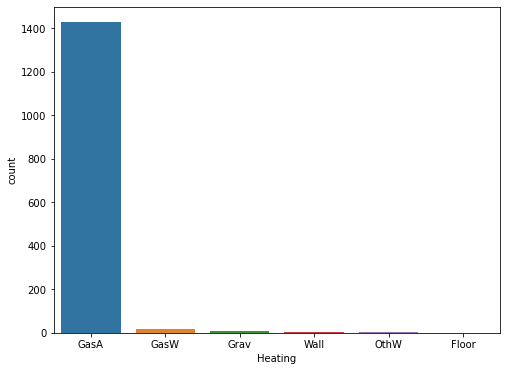

Heatingqc


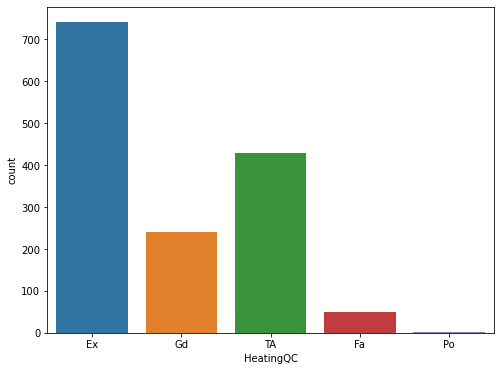

Centralair


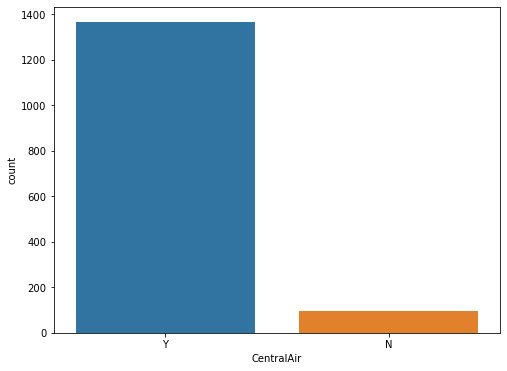

Electrical


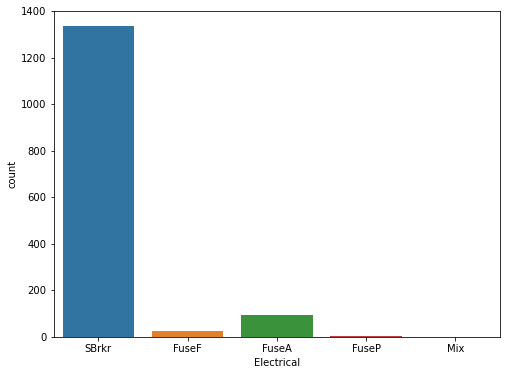

Kitchenqual


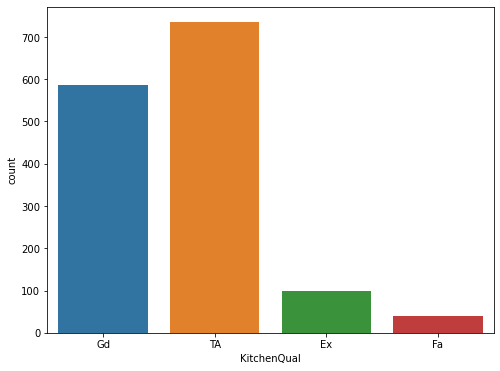

Functional


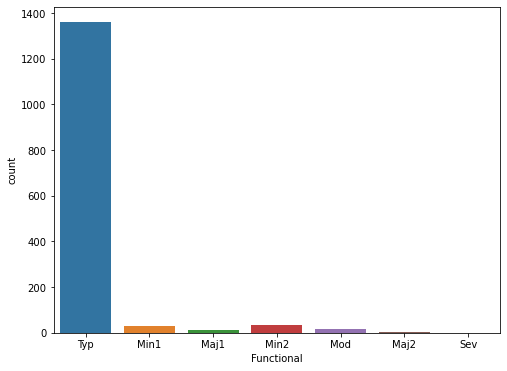

Garagetype


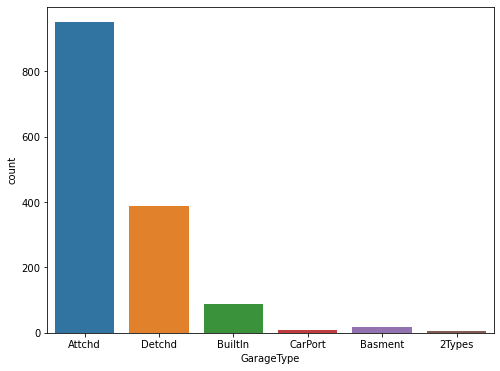

Garagefinish


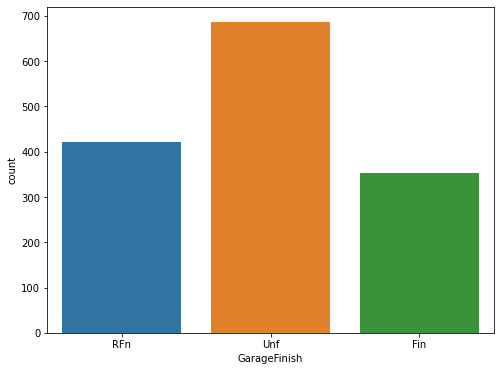

Garagequal


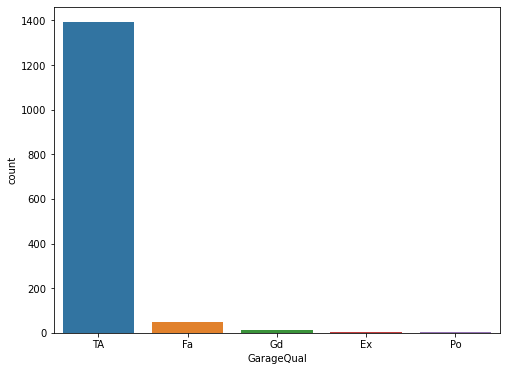

Garagecond


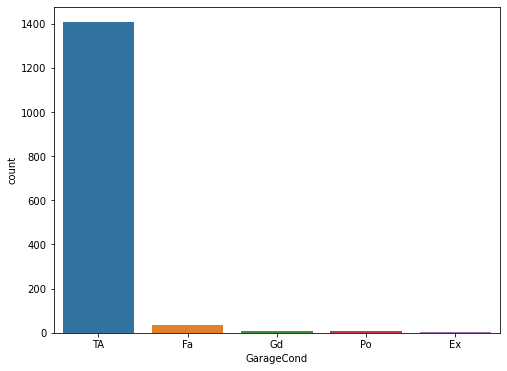

Paveddrive


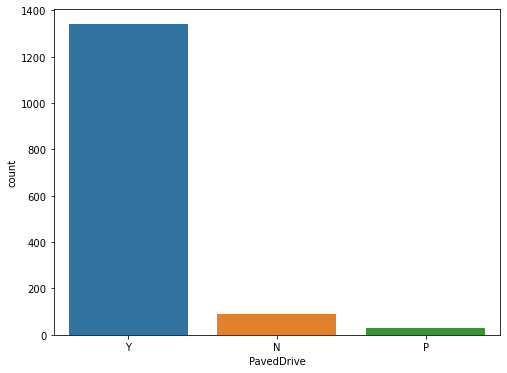

Saletype


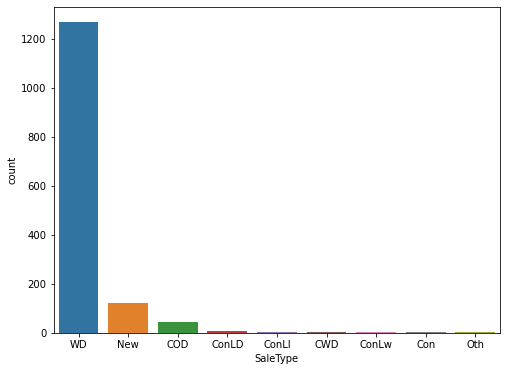

Salecondition


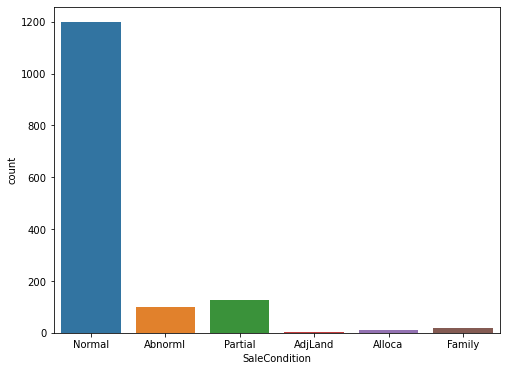

In [21]:
# Countplot for each categorical variable
for column in df_cat:
    print(column.title())
    plt.figure(figsize=(8, 6))
    ax = sns.countplot(x = df[column])
    plt.show()

### Insights:
    - The above graph represents the counts of observations in each categorical bin using bar

# Correlation Matrix

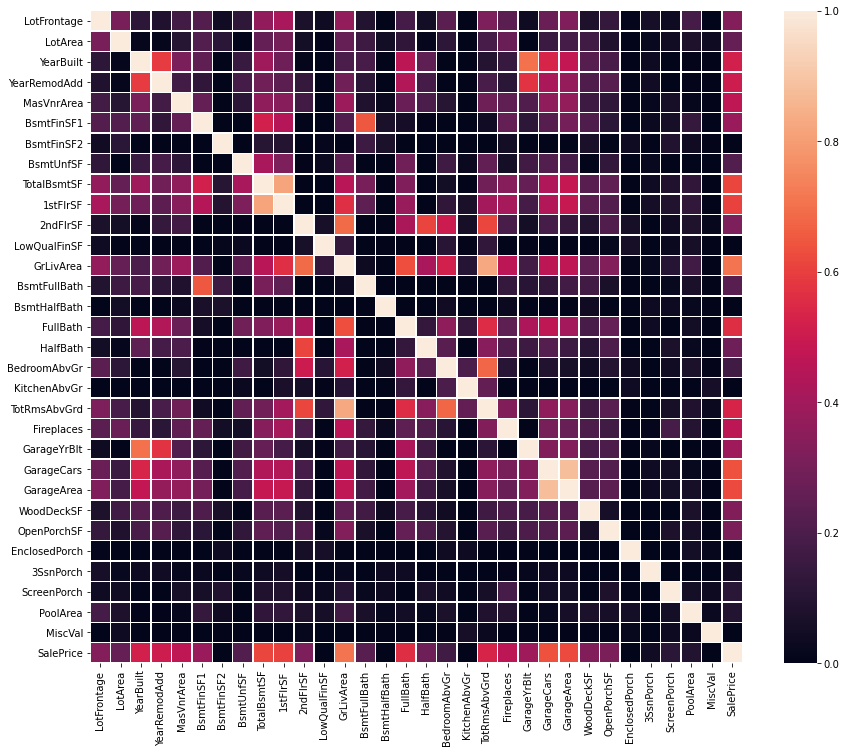

In [22]:
corr = df.corr()
f, ax = plt.subplots(figsize=(15, 12))
sns.heatmap(corr, linewidths=.5, vmin=0, vmax=1, square=True)
plt.show()

## Insights:
   - Based on the above plotted graph we can see that light orange coloured square boxes are strongly correlated between     'SalePrice' (Dependent Variable) and 'TotalBsmtSF', 'OverallQual', 'GrLivArea', 'TotalBsmtSF', '1stFlrSF' 'GarageArea' etc( Independed variable).

### 'SalePrice' Correlation Matrix

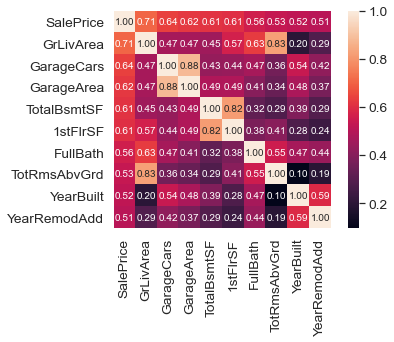

In [23]:
k = 10 #number of variables for heatmap
cols = corr.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

### Insights:
    - These are the variables mostly correalted with 'SalePrice' 
    - GrLivArea, GarageCars and GarageArea are mostly correlated with 'SalePrice'

# Bivariate Analysis

## Numerical Analysis

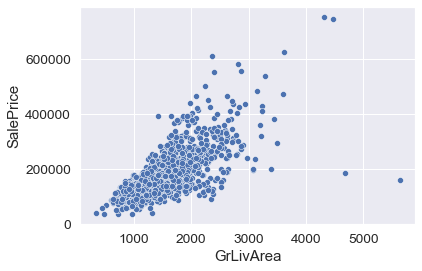

In [24]:
#checking the linear relationship between GrLivArea vs SalePrice
sns.scatterplot(x='GrLivArea', y='SalePrice', data=df)
plt.show()

### Insights:
    - The above plotted graph shows the linear relationship between GrLivArea and SalePrice
    - We can see that outliers are also detected in the above graph

In [25]:
#Treating outliers for the plotted graph
df.drop(df[df.GrLivArea>4000].index, inplace=True)
df.reset_index(drop=True, inplace=True)

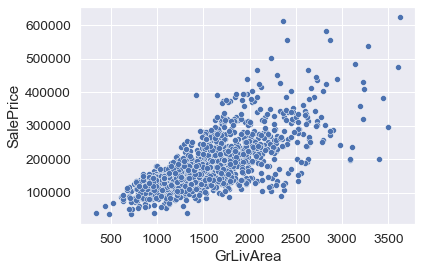

In [26]:
sns.scatterplot(x='GrLivArea', y='SalePrice', data=df)
plt.show()

### Insights:
    - GrLivArea and SalePrice shows the perfect linear relation after removing outliers

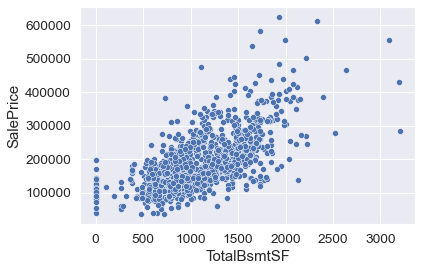

In [27]:
#plotting TotalBsmtSF Vs SalePrice
sns.scatterplot(x='TotalBsmtSF', y='SalePrice', data=df)
plt.show()

### Insights:
    -'TotalBsmt' and 'SalePrice' also showing linear relationship.
    - It seems that at zero Total square feet of basement area there is the some sale price of the house.
    - And we can see that there are outliers present in the above graph.

In [28]:
#Drop observations where TotalBsmtSF is greater than 3000
df.drop(df[df.TotalBsmtSF>3000].index, inplace=True)
df.reset_index(drop=True, inplace=True)

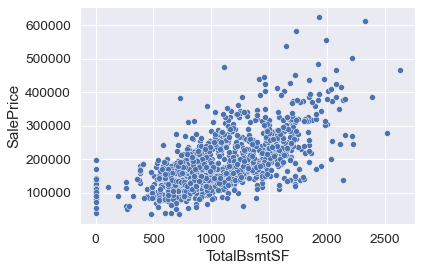

In [29]:
sns.scatterplot(x='TotalBsmtSF', y='SalePrice', data=df)
plt.show()

### Insights:
    - After treating of outliers the graph shows the perfect linear relation between 'TotalBsmtSF' and 'SalePrice'

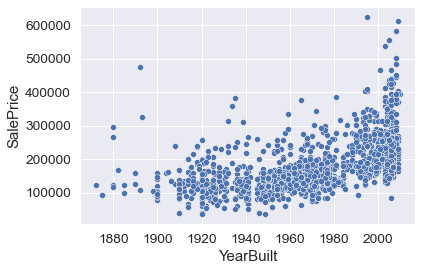

In [30]:
#Scatter plot of YearBuilt Vs SalePrice
sns.scatterplot(x='YearBuilt', y='SalePrice', data=df)
plt.show()

### Insights:
    - we can observe that as year is passing sale price of the house also increasing and it shows linear relation
    - we can see that outliers are present in between 1880 to 1900

In [31]:
#Drop observations where YearBuilt is less than 1893
df.drop(df[df.YearBuilt<1893].index, inplace=True)
df.reset_index(drop=True, inplace=True)

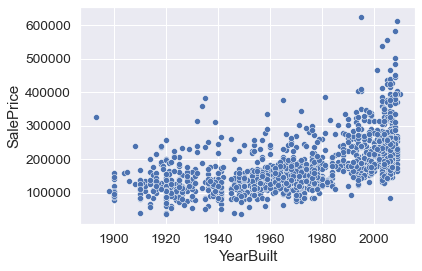

In [32]:
sns.scatterplot(x='YearBuilt', y='SalePrice', data=df)
plt.show()

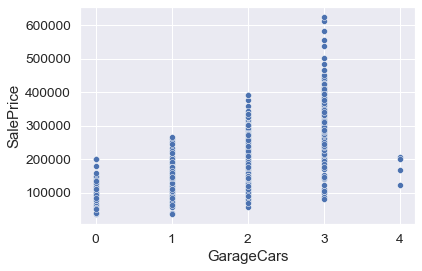

In [33]:
#Scatter plot of GarageCars Vs SalePrice
sns.scatterplot(x='GarageCars', y='SalePrice', data=df)
plt.show()

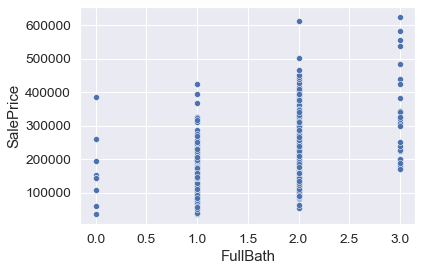

In [34]:
#Scatter plot of FullBath Vs SalePrice
sns.scatterplot(x='FullBath', y='SalePrice', data=df)
plt.show()

### Insights:
    - 'GrLivArea' and 'TotalBsmtSF' seem to be linearly related with 'SalePrice'. 
    - Both relationships are positive, which means that as one variable increases, the other also increases
    - 'TotalBmtSF' we can see that the slope of the linear relationship is high
    - 'FullBath' we can see that relationship seems to be stronger and no oytliers are present

## Categorical  Variable Analysis

Mszoning


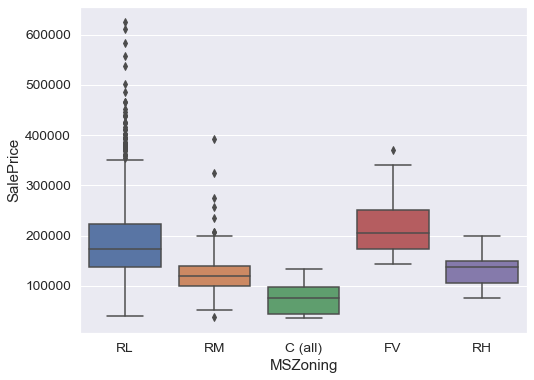

Street


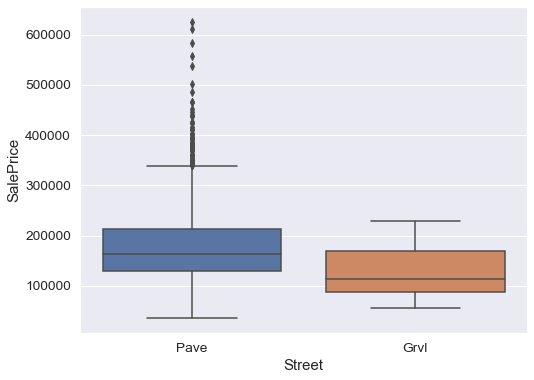

Lotshape


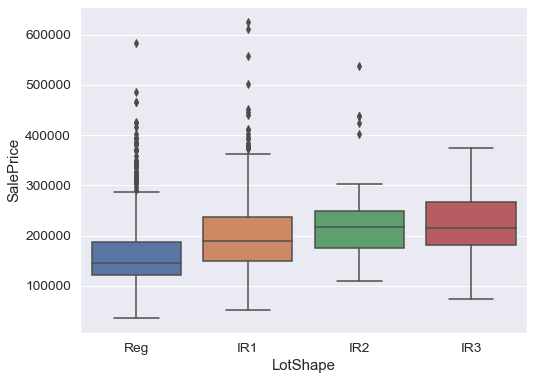

Landcontour


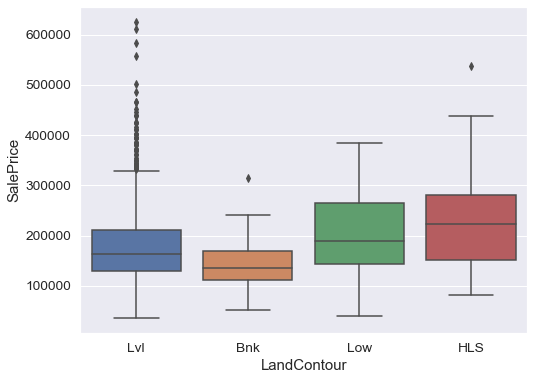

Utilities


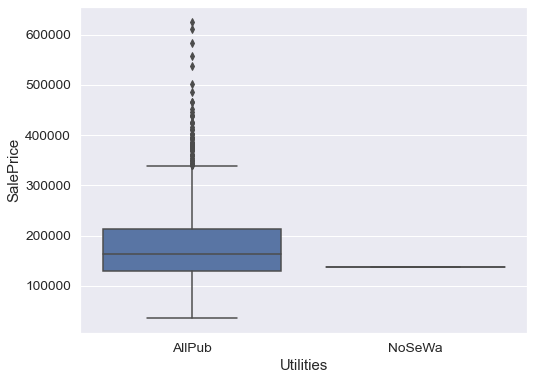

Lotconfig


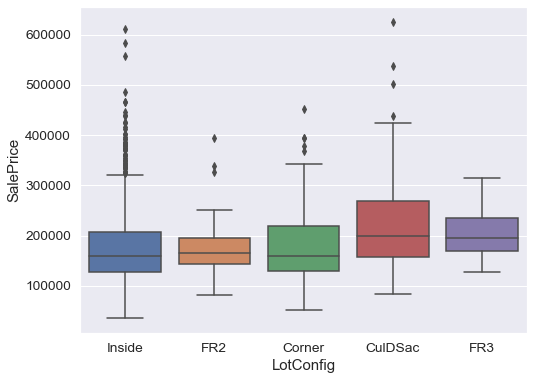

Landslope


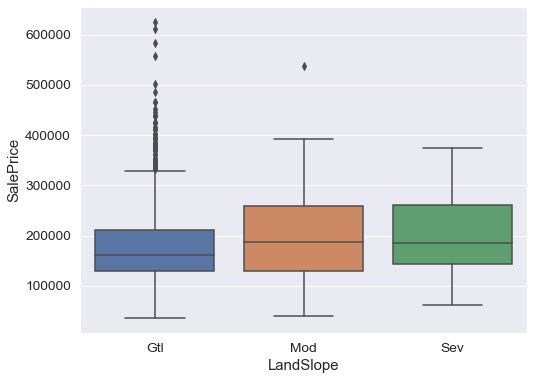

Neighborhood


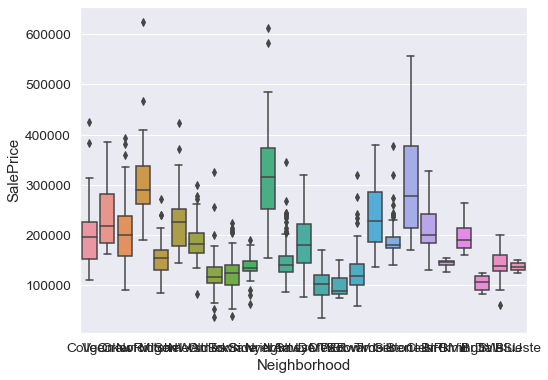

Condition1


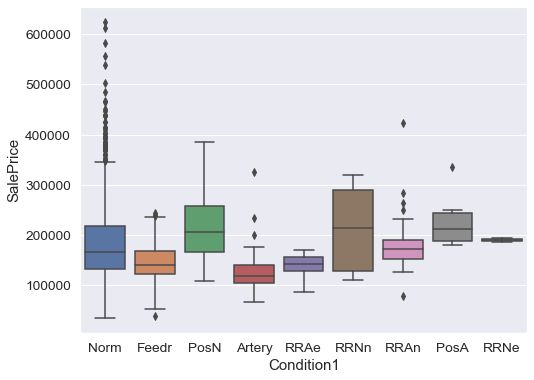

Condition2


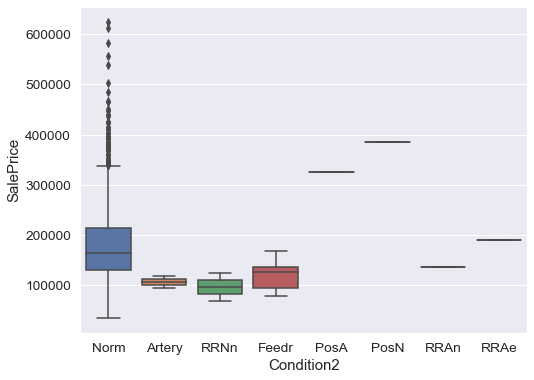

Bldgtype


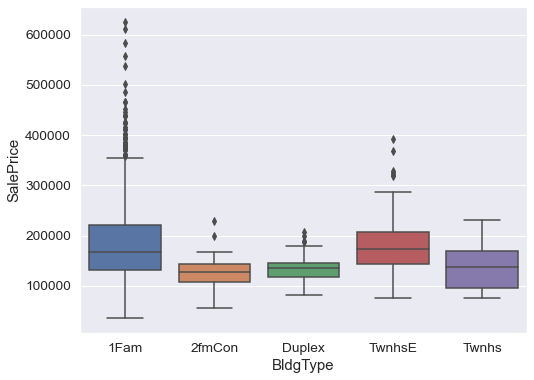

Housestyle


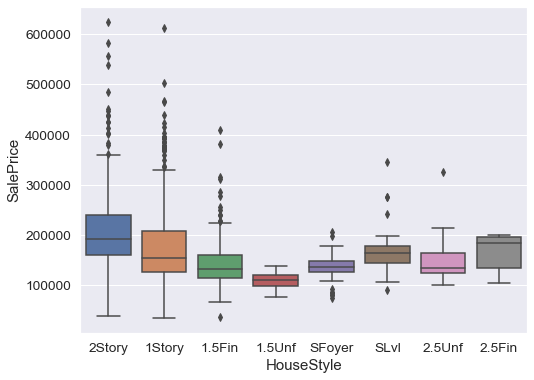

Roofstyle


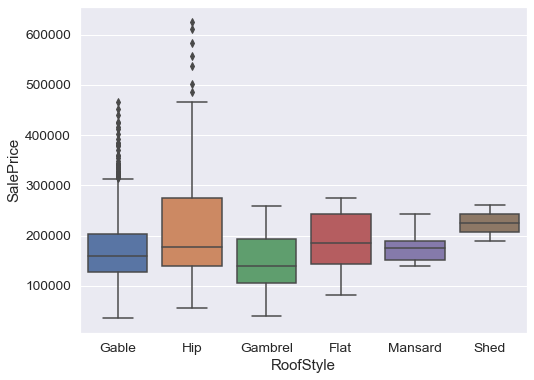

Roofmatl


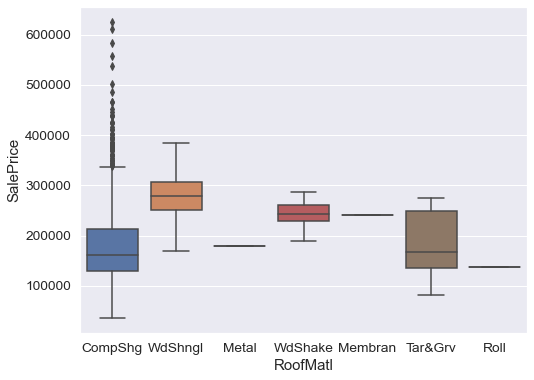

Exterior1St


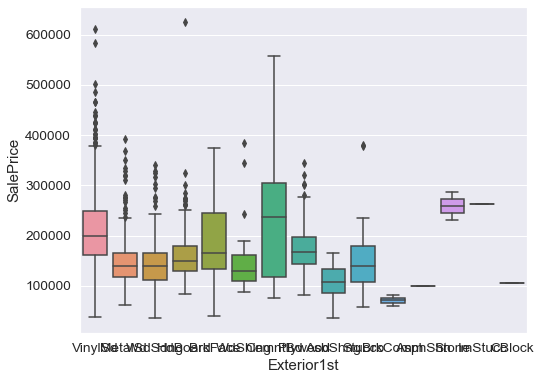

Exterior2Nd


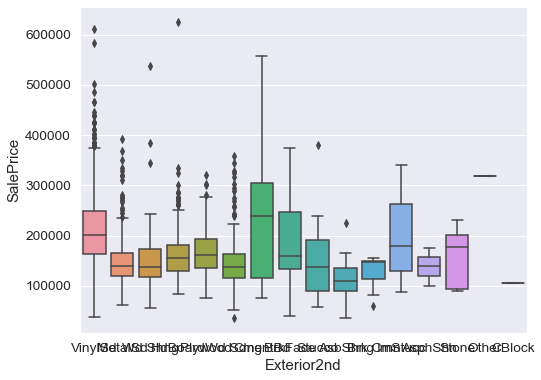

Masvnrtype


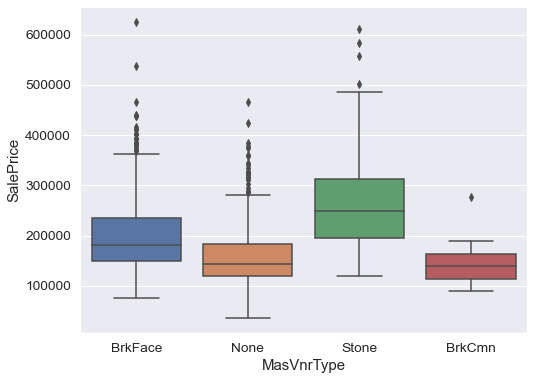

Exterqual


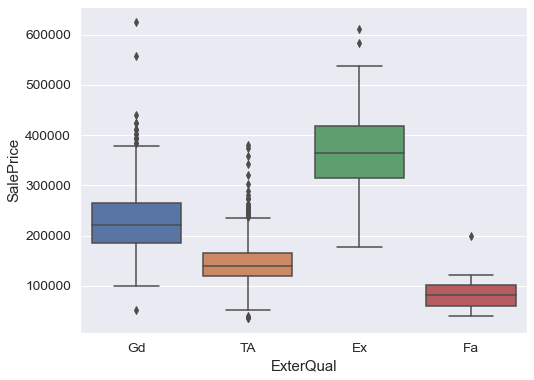

Extercond


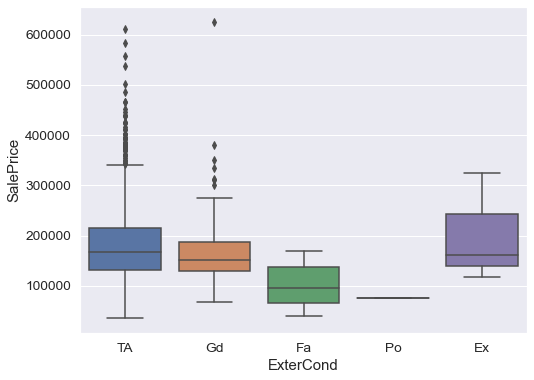

Foundation


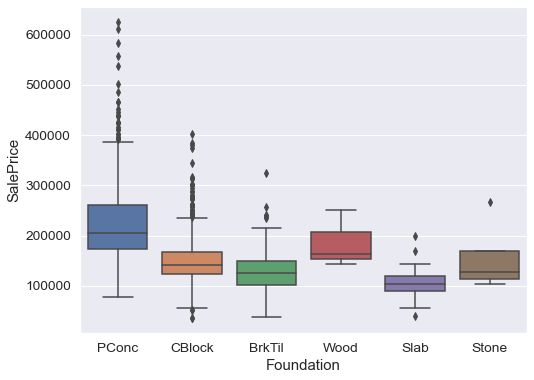

Bsmtqual


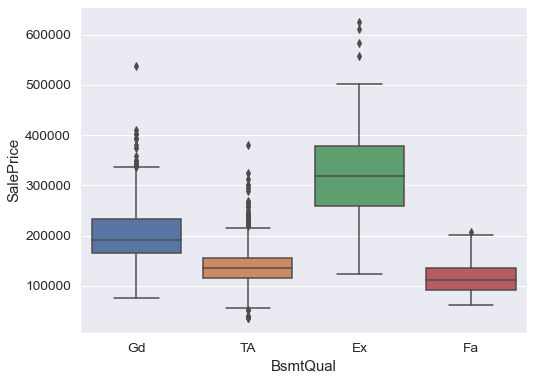

Bsmtcond


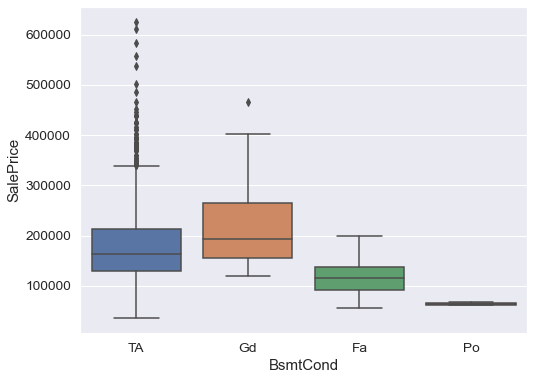

Bsmtexposure


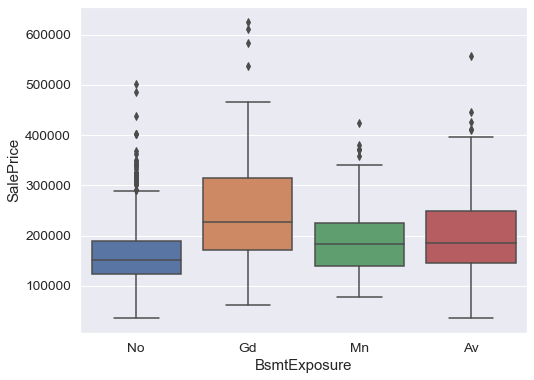

Bsmtfintype1


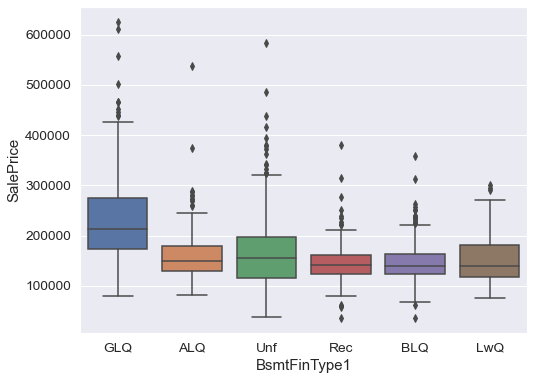

Bsmtfintype2


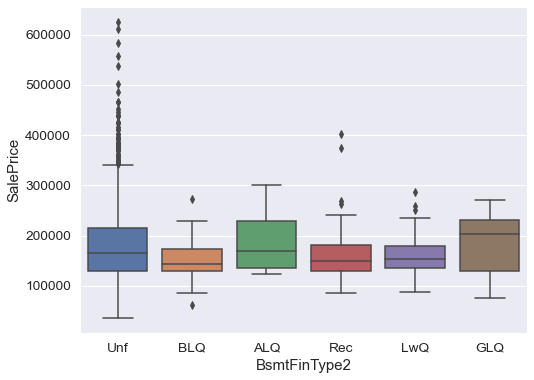

Heating


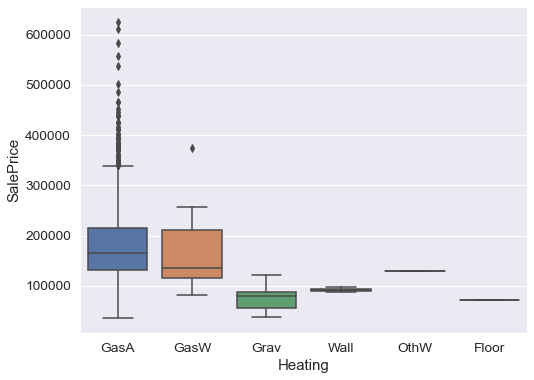

Heatingqc


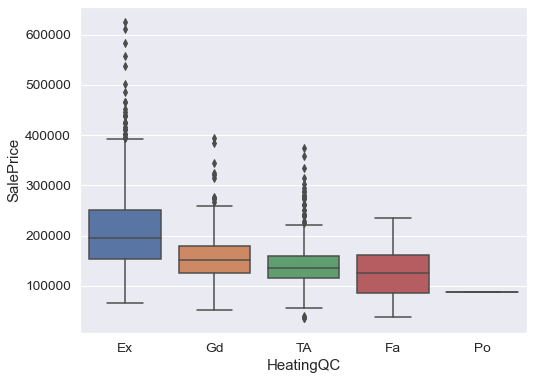

Centralair


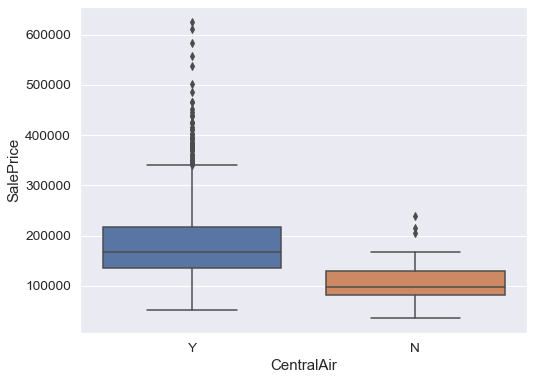

Electrical


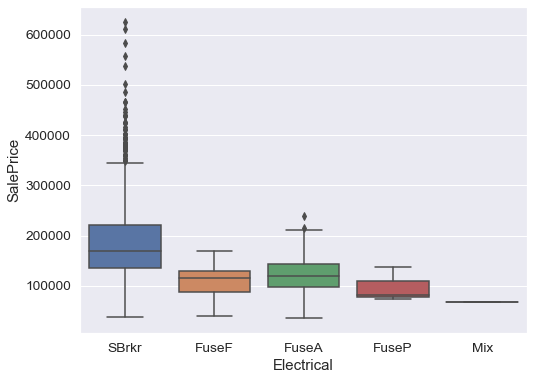

Kitchenqual


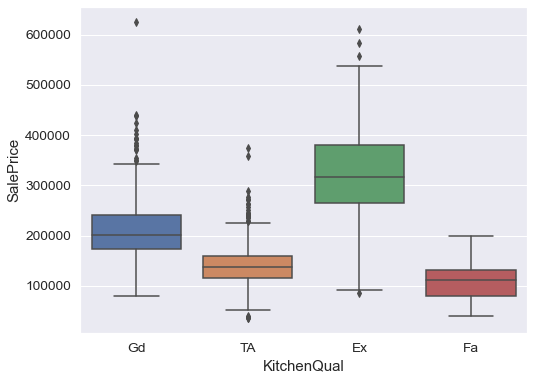

Functional


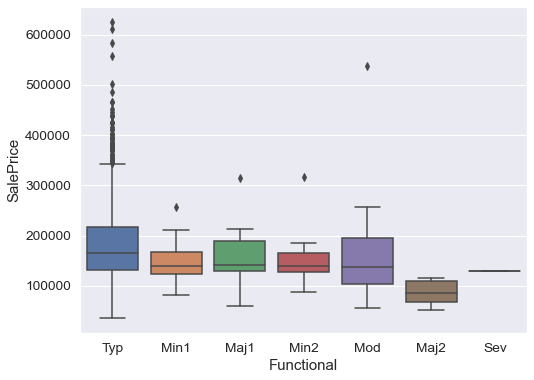

Garagetype


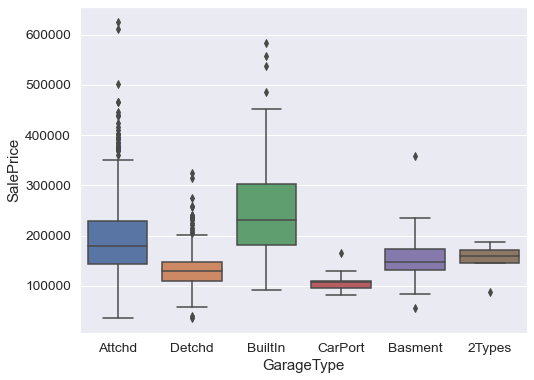

Garagefinish


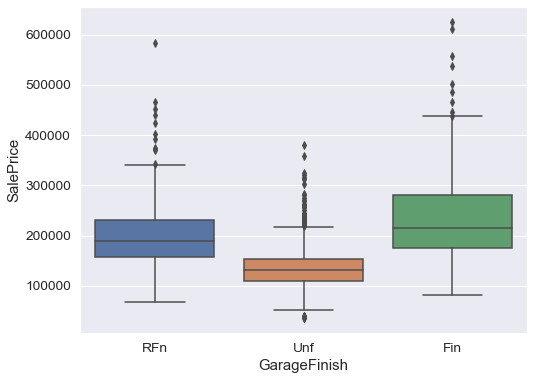

Garagequal


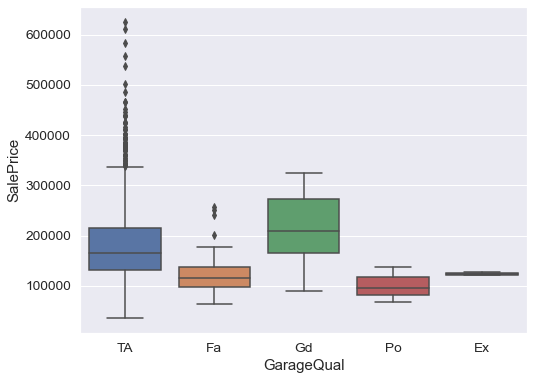

Garagecond


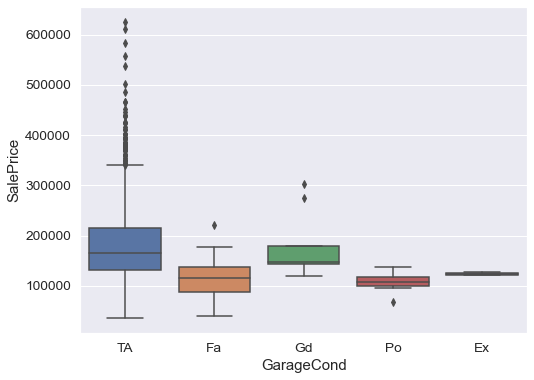

Paveddrive


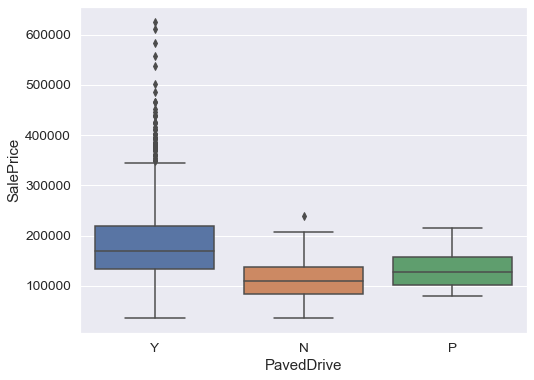

Saletype


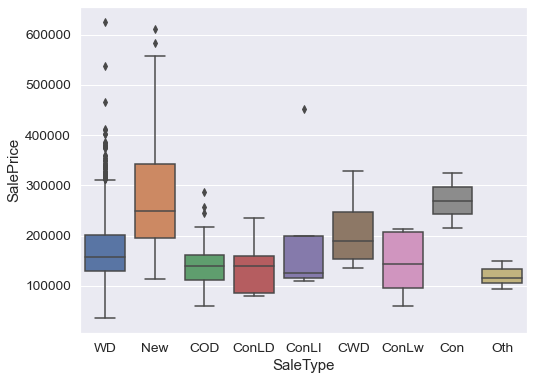

Salecondition


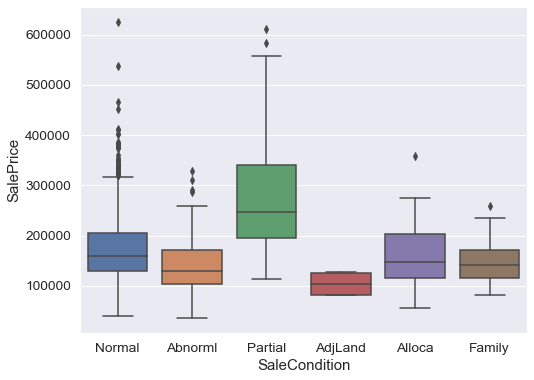

In [35]:
#categorical variable ana;ysis using box plot
for column in df_cat:
    print(column.title())
    plt.figure(figsize=(8, 6))
    ax = sns.boxplot(x = df[column], y = df["SalePrice"])
    plt.show()

### Insights:
    - The above graph represents the relation between target variable and independent variable and the outliers presnent in the data frame are explained clearly

# Normality 

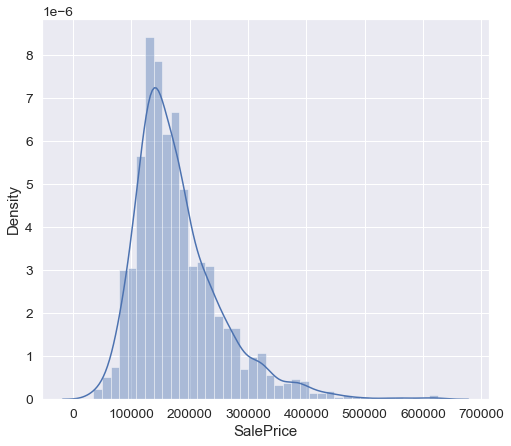

In [36]:
#checking the normality of target variable using distplot
plt.figure(figsize=(8,7))
sns.distplot(df['SalePrice'])
plt.show()

### Insight:
   - we can observe that the SalePrice is not normally distributed it has mostly right skewness
   - we need to treat the skewness by applying log transformation to the target variable 
   - If skewness is 0, the data are perfectly symmetrical, although it is quite unlikely for real-world data. 
   - If skewness is less than -1 or greater than 1, the distribution is highly skewed. If skewness is between -1 and -0.5 or between 0.5 and 1, the distribution is moderately skewed. If skewness is between -0.5 and 0.5, the distribution is approximately symmetric.

In [37]:
#checking skewness and kurtosis for the target variable 'SalePrice'
df['SalePrice'].skew(), df['SalePrice'].kurt()

(1.5256738037412638, 3.7733550368989306)

In [38]:
#Applying log transformation to remove skewness for the target variable
df['SalePrice'] = np.log(df['SalePrice'])

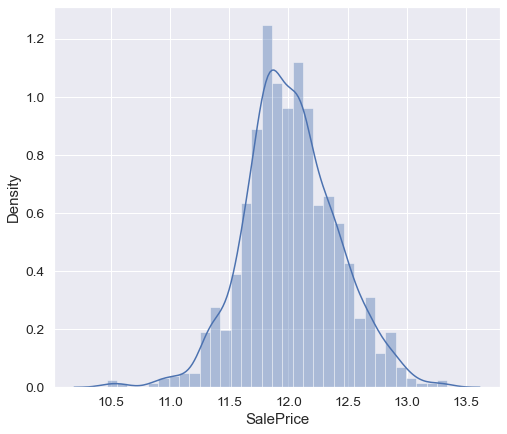

In [39]:
plt.figure(figsize=(8,7))
sns.distplot(df['SalePrice'])
plt.show()

### Insights:
    - We can observe that after applying Log Transformation the data is distributed normally

# Derived Features

In [40]:
#Drop the YearBuilt column and take age of house into consideration
df["BuiltAge"] = df["YearBuilt"].apply(lambda x: max(df["YearBuilt"]) - x)
df = df.drop(['YearBuilt'], axis = 1)

In [41]:
df["RemodAddAge"] = df["YearRemodAdd"].apply(lambda x: max(df["YearRemodAdd"]) - x)
df = df.drop(['YearRemodAdd'], axis = 1)

In [42]:
def combine(x):
    ind = x.index
    ans = []
    for i in ind:
        ans.append(pd.to_datetime(str(x[0]) +"/" + str(df["YrSold"][i]), format='%m/%Y'))
    return ans

In [43]:
df["MonthYearSold"] = df[["MoSold"]].apply(combine)

In [44]:
#we will take the number of days sold difference into consideration
df["SoldDateDiff"] = df["MonthYearSold"].apply(lambda x: max(df["MonthYearSold"]) - x)
df = df.drop(["MonthYearSold", "MoSold", "YrSold"], axis = 1)

In [45]:
df["SoldDateDiff"] = df["SoldDateDiff"].apply(lambda x: str(x)[:-14])

In [46]:
# We will remove the column name from var_numerical and var_categorical columns 
for col in ["YearBuilt", "YearRemodAdd", "MonthYearSold", "MoSold", "YrSold"]:
    if col in df_num:
        df_num = list(set(df_num) - set([col]))
    elif col in df_cat:
        df_cat = list(set(df_cat) - set([col]))

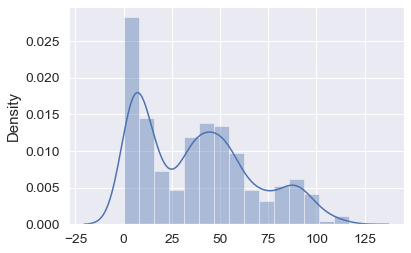

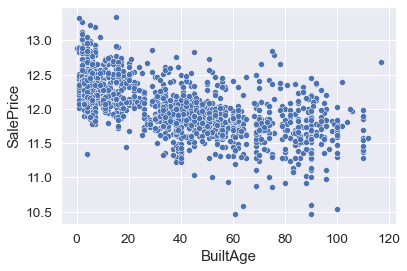

In [47]:
# Plot to the distribution of the new derived columns
sns.distplot(x = df["BuiltAge"])
plt.show()
sns.scatterplot(x = df["BuiltAge"], y = df["SalePrice"])
plt.show()

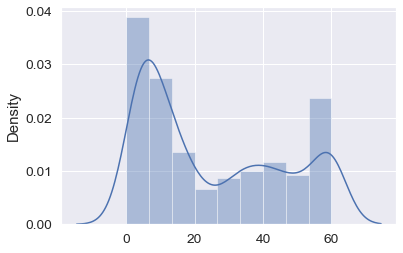

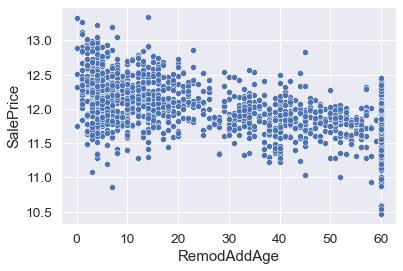

In [48]:
# Plot to the distribution of the new derived columns
sns.distplot(x = df["RemodAddAge"])
plt.show()
sns.scatterplot(x = df["RemodAddAge"], y = df["SalePrice"])
plt.show()

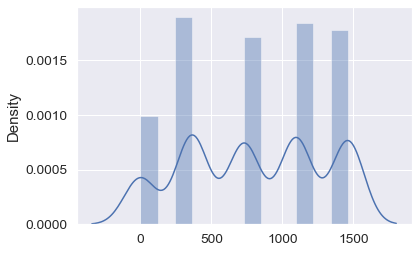

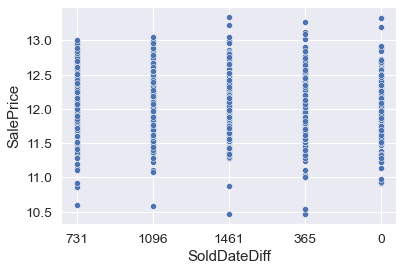

In [49]:
# Plot to the distribution of the new derived columns
sns.distplot(x = df["SoldDateDiff"])
plt.show()
sns.scatterplot(x = df["SoldDateDiff"], y = df["SalePrice"])
plt.show()

In [50]:
df_num = df_num + ['BuiltAge', 'RemodAddAge', 'SoldDateDiff']
df_num

['SalePrice',
 'BsmtFinSF1',
 'Fireplaces',
 'GarageArea',
 'MiscVal',
 'TotalBsmtSF',
 'OverallCond',
 'GarageYrBlt',
 'BsmtHalfBath',
 'BsmtFinSF2',
 'LotArea',
 '2ndFlrSF',
 'LowQualFinSF',
 '3SsnPorch',
 'OpenPorchSF',
 'MasVnrArea',
 'WoodDeckSF',
 'FullBath',
 'GrLivArea',
 'OverallQual',
 'TotRmsAbvGrd',
 'LotFrontage',
 'BsmtUnfSF',
 'EnclosedPorch',
 '1stFlrSF',
 'HalfBath',
 'MSSubClass',
 'GarageCars',
 'KitchenAbvGr',
 'BedroomAbvGr',
 'BsmtFullBath',
 'PoolArea',
 'ScreenPorch',
 'BuiltAge',
 'RemodAddAge',
 'SoldDateDiff']

In [51]:
df.shape

(1440, 74)

# Feature Engineering

In [52]:
#Let's extract categorical variables first and convert them into category.
df_cat = df.select_dtypes(include = ['object']).astype('category')
df_cat.head()

,MSSubClass,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition,SoldDateDiff
0,60,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal,731
1,20,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,Attchd,RFn,TA,TA,Y,WD,Normal,1096
2,60,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal,731
3,70,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Detchd,Unf,TA,TA,Y,WD,Abnorml,1461
4,60,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal,731


# Creating Dummies for categorical variables

In [53]:
mszoning = pd.get_dummies(df['MSZoning'], drop_first=True)
street = pd.get_dummies(df['Street'], drop_first=True)
lotshape = pd.get_dummies(df['LotShape'], drop_first=True)
landcontour = pd.get_dummies(df['LandContour'], drop_first=True)
utilities = pd.get_dummies(df['Utilities'], drop_first=True)
lotconfig = pd.get_dummies(df['LotConfig'], drop_first=True)
neighborhood = pd.get_dummies(df['Neighborhood'], drop_first=True)
condition1 = pd.get_dummies(df['Condition1'], drop_first=True)
condition2 = pd.get_dummies(df['Condition2'], drop_first=True)
bldgtype = pd.get_dummies(df['BldgType'], drop_first=True)
roofstyle = pd.get_dummies(df['RoofStyle'], drop_first=True)
exterior1st = pd.get_dummies(df['Exterior1st'], drop_first=True)
exterior2nd = pd.get_dummies(df['Exterior2nd'], drop_first=True)
masvnrtype = pd.get_dummies(df['MasVnrType'], drop_first=True)
exterqual = pd.get_dummies(df['ExterQual'], drop_first=True)
extercond = pd.get_dummies(df['ExterCond'], drop_first=True)
foundation = pd.get_dummies(df['Foundation'], drop_first=True)
bsmtqual = pd.get_dummies(df['BsmtQual'], drop_first=True)
bsmtexposure = pd.get_dummies(df['BsmtExposure'], drop_first=True)
bsmtfintype1 = pd.get_dummies(df['BsmtFinType1'], drop_first=True)
bsmtfintype2 = pd.get_dummies(df['BsmtFinType2'], drop_first=True)
heating = pd.get_dummies(df['Heating'], drop_first=True)
heatingqc = pd.get_dummies(df['HeatingQC'], drop_first=True)
centralair = pd.get_dummies(df['CentralAir'], drop_first=True)
electrical = pd.get_dummies(['Electrical'], drop_first=True)
kitchenqual = pd.get_dummies(df['KitchenQual'], drop_first=True)
functional = pd.get_dummies(df['Functional'], drop_first=True)
paveddrive = pd.get_dummies(df['PavedDrive'], drop_first=True)
saletype = pd.get_dummies(df['SaleType'], drop_first=True)
salecondition = pd.get_dummies(df['SaleCondition'], drop_first=True)

In [54]:
df = pd.concat([df, mszoning, street, salecondition, saletype, paveddrive, functional, kitchenqual, electrical, centralair, heatingqc, heating, bsmtfintype2, bsmtfintype1, bsmtexposure, bsmtqual, foundation, extercond, exterqual, masvnrtype, exterior2nd, exterior1st, roofstyle, bldgtype, condition2, condition1, neighborhood, lotconfig, utilities, landcontour, lotshape], axis=1)

In [55]:
df.drop(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'PavedDrive', 'SaleType', 'SaleCondition'], axis=1, inplace=True)

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1440 entries, 0 to 1439
Columns: 202 entries, MSSubClass to Reg
dtypes: float64(4), int64(28), object(12), uint8(158)
memory usage: 728.4+ KB


In [57]:
df.shape

(1440, 202)

In [58]:
df.head()

,MSSubClass,LotFrontage,LotArea,LandSlope,HouseStyle,OverallQual,OverallCond,RoofMatl,MasVnrArea,BsmtCond,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice,BuiltAge,RemodAddAge,SoldDateDiff,FV,RH,RL,RM,Pave,AdjLand,Alloca,Family,Normal,Partial,CWD,Con,ConLD,ConLI,ConLw,New,Oth,WD,P,Y,Maj2,Min1,Min2,Mod,Sev,Typ,Fa,Gd,TA,Y,Fa,Gd,Po,TA,GasA,GasW,Grav,OthW,Wall,BLQ,GLQ,LwQ,Rec,Unf,BLQ,GLQ,LwQ,Rec,Unf,Gd,Mn,No,Fa,Gd,TA,CBlock,PConc,Slab,Stone,Wood,Fa,Gd,Po,TA,Fa,Gd,TA,BrkFace,None,Stone,AsphShn,Brk Cmn,BrkFace,CBlock,CmentBd,HdBoard,ImStucc,MetalSd,Other,Plywood,Stone,Stucco,VinylSd,Wd Sdng,Wd Shng,AsphShn,BrkComm,BrkFace,CBlock,CemntBd,HdBoard,ImStucc,MetalSd,Plywood,Stone,Stucco,VinylSd,Wd Sdng,WdShing,Gable,Gambrel,Hip,Mansard,Shed,2fmCon,Duplex,Twnhs,TwnhsE,Feedr,Norm,PosA,PosN,RRAe,RRAn,RRNn,Feedr,Norm,PosA,PosN,RRAe,RRAn,RRNe,RRNn,Blueste,BrDale,BrkSide,ClearCr,CollgCr,Crawfor,Edwards,Gilbert,IDOTRR,MeadowV,Mitchel,NAmes,NPkVill,NWAmes,NoRidge,NridgHt,OldTown,SWISU,Sawyer,SawyerW,Somerst,StoneBr,Timber,Veenker,CulDSac,FR2,FR3,Inside,NoSeWa,HLS,Low,Lvl,IR2,IR3,Reg
0,60,65.0,8450,Gtl,2Story,7,5,CompShg,196.0,TA,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,Attchd,2003.0,RFn,2,548,TA,TA,0,61,0,0,0,0,0,12.247694,7,7,731,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1
1,20,80.0,9600,Gtl,1Story,6,8,CompShg,0.0,TA,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,Attchd,1976.0,RFn,2,460,TA,TA,298,0,0,0,0,0,0,12.109011,34,34,1096,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1
2,60,68.0,11250,Gtl,2Story,7,5,CompShg,162.0,TA,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,Attchd,2001.0,RFn,2,608,TA,TA,0,42,0,0,0,0,0,12.317167,9,8,731,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
3,70,60.0,9550,Gtl,2Story,7,5,CompShg,0.0,Gd,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,Detchd,1998.0,Unf,3,642,TA,TA,0,35,272,0,0,0,0,11.849398,95,40,1461,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,60,84.0,14260,Gtl,2Story,8,5,CompShg,350.0,TA,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,Attchd,2000.0,RFn,3,836,TA,TA,192,84,0,0,0,0,0,12.429216,10,10,731,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0


In [59]:
df = df.drop(['LandSlope', 'RoofMatl', 'HouseStyle', 'BsmtCond','GarageType','GarageFinish','GarageQual','GarageCond'],axis=1)

In [60]:
df.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice,BuiltAge,RemodAddAge,SoldDateDiff,FV,RH,RL,RM,Pave,AdjLand,Alloca,Family,Normal,Partial,CWD,Con,ConLD,ConLI,ConLw,New,Oth,WD,P,Y,Maj2,Min1,Min2,Mod,Sev,Typ,Fa,Gd,TA,Y,Fa,Gd,Po,TA,GasA,GasW,Grav,OthW,Wall,BLQ,GLQ,LwQ,Rec,Unf,BLQ,GLQ,LwQ,Rec,Unf,Gd,Mn,No,Fa,Gd,TA,CBlock,PConc,Slab,Stone,Wood,Fa,Gd,Po,TA,Fa,Gd,TA,BrkFace,None,Stone,AsphShn,Brk Cmn,BrkFace,CBlock,CmentBd,HdBoard,ImStucc,MetalSd,Other,Plywood,Stone,Stucco,VinylSd,Wd Sdng,Wd Shng,AsphShn,BrkComm,BrkFace,CBlock,CemntBd,HdBoard,ImStucc,MetalSd,Plywood,Stone,Stucco,VinylSd,Wd Sdng,WdShing,Gable,Gambrel,Hip,Mansard,Shed,2fmCon,Duplex,Twnhs,TwnhsE,Feedr,Norm,PosA,PosN,RRAe,RRAn,RRNn,Feedr,Norm,PosA,PosN,RRAe,RRAn,RRNe,RRNn,Blueste,BrDale,BrkSide,ClearCr,CollgCr,Crawfor,Edwards,Gilbert,IDOTRR,MeadowV,Mitchel,NAmes,NPkVill,NWAmes,NoRidge,NridgHt,OldTown,SWISU,Sawyer,SawyerW,Somerst,StoneBr,Timber,Veenker,CulDSac,FR2,FR3,Inside,NoSeWa,HLS,Low,Lvl,IR2,IR3,Reg
0,60,65.0,8450,7,5,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,12.247694,7,7,731,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1
1,20,80.0,9600,6,8,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,12.109011,34,34,1096,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1
2,60,68.0,11250,7,5,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,12.317167,9,8,731,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
3,70,60.0,9550,7,5,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,11.849398,95,40,1461,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,60,84.0,14260,8,5,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12.429216,10,10,731,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0


# Train_Test_Split

In [61]:
#Separating the data set and assigning to X and y 
X = df.drop('SalePrice', axis=1)
y = df['SalePrice']

In [62]:
X_train, X_test,y_train,y_test = train_test_split(X,y,train_size=0.7,test_size=0.3,random_state=1)

In [63]:
X_train.shape, y_train.shape, X_test.shape

((1007, 193), (1007,), (432, 193))

In [64]:
for col in list(X_train.columns):
    if col not in list(X_test.columns):
        X_train = X_train.drop([col], axis = 1)

In [65]:
df_num = list(set(df_num) - set(['SalePrice']))

# Feature Scaling

In [66]:
#we have removed some columns which are highly skewed variables so we are using robust scaler
scaler = RobustScaler()

In [67]:
#Fit and Transform the data
X_train[df_num] = scaler.fit_transform(X_train[df_num])
X_test[df_num] = scaler.fit_transform(X_test[df_num])

# Model Building

## Linear Regression

In [68]:
lr = LinearRegression()

In [69]:
lr.fit(X_train,y_train)

LinearRegression()

In [70]:
y_pred_train_lr = lr.predict(X_train)
y_pred_test_lr = lr.predict(X_test)

metric_lr = []
r2_train_lr = r2_score(y_train, y_pred_train_lr)
print("R2 Train Score: ", r2_train_lr)
metric_lr.append(r2_train_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train_lr)
print("Mean Squared Train Error: ", mse_train_lr)
metric_lr.append(mse_train_lr**0.5)

R2 Train Score:  0.943870475962398
Mean Squared Train Error:  0.0086187227115006


## Linear Regression with RFE

In [71]:
#Running RFE for 50 columns
rfe = RFE(lr, 50)   
rfe = rfe.fit(X_train, y_train)

In [72]:
col = X_train.columns[rfe.support_]
len(col)

50

In [73]:
lr_with_rfe = LinearRegression()
lr_with_rfe.fit(X_train[col], y_train)
y_train_pred_rfe = lr_with_rfe.predict(X_train[col])
y_test_pred_rfe = lr_with_rfe.predict(X_test[col])

print("Linear regression train r2_score: ", r2_score(y_train, y_train_pred_rfe))

Linear regression train r2_score:  0.9228628375591563


### Insights:
    - We can observe that r2_score is low with 50 features so we wil not drop more features

## Ridge Regression with Hyperparameter tuning

In [74]:
seed = 50

In [75]:
#initialisation of ridge linear regression model
ridge_lr = Ridge(random_state=seed)

In [76]:
#create dufferent hyperparameters of ridge
param_ridge_lr = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

print(param_ridge_lr)

{'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000]}


In [77]:
#KFold ridge validation
folds_ridge = KFold(n_splits = 4, shuffle = True, random_state=100)

In [78]:
#Grid search CV with 4 folds 
grid_ridge = GridSearchCV(estimator = ridge_lr, scoring= 'neg_root_mean_squared_error', param_grid = param_ridge_lr, cv = folds_ridge, 
                           verbose=0, return_train_score=True, n_jobs=3)
grid_ridge.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=4, random_state=100, shuffle=True),
             estimator=Ridge(random_state=50), n_jobs=3,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_root_mean_squared_error')

In [79]:
#cv results
pd.DataFrame(grid_ridge.cv_results_)[['param_alpha', 'mean_test_score', 'mean_train_score']]

,param_alpha,mean_test_score,mean_train_score
0,0.0001,-0.134830,-0.088052
1,0.001,-0.134773,-0.088052
2,0.01,-0.134232,-0.088057
3,0.05,-0.132328,-0.088132
4,0.1,-0.130654,-0.088290
5,0.2,-0.128531,-0.088680
6,0.3,-0.127242,-0.089090
7,0.4,-0.126373,-0.089487
8,0.5,-0.125744,-0.089862
9,0.6,-0.125264,-0.090214


## Ridge regression with best parameter

In [80]:
#Fitting Ridge model for best ridge parameter and printing coefficients which have been penalised
alpha = grid_ridge.best_estimator_.alpha
ridge = Ridge(alpha=alpha, random_state=seed)

ridge = ridge.fit(X_train, y_train)
ridge

Ridge(alpha=10.0, random_state=50)

In [81]:
#predictons on train and test ridge regression
y_pred_train = ridge.predict(X_train)
y_pred_test_ridge = ridge.predict(X_test)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print("R2 Train Score: ", r2_train_lr)
metric2.append(r2_train_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print("Mean Squared Train Error: ", mse_train_lr)
metric2.append(mse_train_lr**0.5)

R2 Train Score:  0.9325145249567875
Mean Squared Train Error:  0.010362435926976579


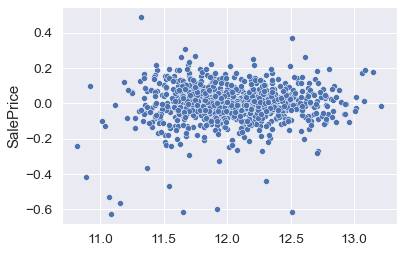

In [82]:
sns.scatterplot(y = y_train - y_pred_train, x = y_pred_train)
plt.show()

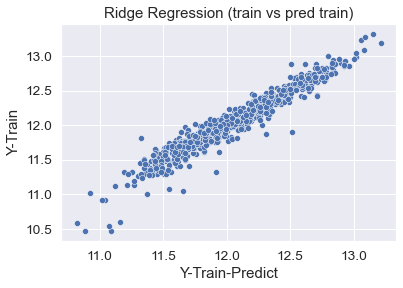

In [83]:
sns.scatterplot(y = y_train , x = y_pred_train)
plt.ylabel("Y-Train")
plt.xlabel("Y-Train-Predict")
plt.title("Ridge Regression (train vs pred train)")
plt.show()

### Insights:
    - The above graph shows how the variables are showing strong linear relationship using ridge regression

### Ridge with best alpha feature coefficient values in descending order

In [84]:
ridge_beta = pd.DataFrame(index=X_train.columns)
ridge_beta.rows = X_train.columns
ridge_beta["Ridge with best alpha"] = abs(ridge.coef_)
pd.set_option('display.max_rows', None)
ridge_beta = ridge_beta.sort_values(by = 'Ridge with best alpha', ascending=False)
ridge_beta

,Ridge with best alpha
OverallQual,0.108570
GrLivArea,0.103976
Crawfor,0.090868
BuiltAge,0.076651
Y,0.076444
RL,0.073061
StoneBr,0.068809
IDOTRR,0.067082
Normal,0.064929
FV,0.064179


In [85]:
len(ridge_beta[ridge_beta["Ridge with best alpha"]==0])

2

# Lasso Regression with hyperparameter tuning

In [86]:
#initialisation of lasso linear regression model
lasso_lr = Lasso(random_state=50)

In [87]:
#create different hyperparameters of ridge
param_lasso_lr = {
    'alpha': [0.0001, 0.0002, 0.0004, 0.0008, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]
}
print(param_lasso_lr)

{'alpha': [0.0001, 0.0002, 0.0004, 0.0008, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000]}


In [88]:
#KFold validation
folds_lasso = KFold(n_splits = 3, shuffle = True, random_state=100)

In [89]:
#Gridsearch with 3 folds validation
grid_lasso = GridSearchCV(estimator = lasso_lr, scoring= 'neg_root_mean_squared_error', param_grid = param_lasso_lr, 
                          cv = folds_lasso, verbose=0, return_train_score=True, n_jobs=3)
grid_lasso.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=3, random_state=100, shuffle=True),
             estimator=Lasso(random_state=50), n_jobs=3,
             param_grid={'alpha': [0.0001, 0.0002, 0.0004, 0.0008, 0.001, 0.01,
                                   0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8,
                                   0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0,
                                   9.0, 10.0, 20, 50, 100, 500, ...]},
             return_train_score=True, scoring='neg_root_mean_squared_error')

In [90]:
#CV results
pd.DataFrame(grid_lasso.cv_results_)[['param_alpha', 'mean_test_score', 'mean_train_score']]

,param_alpha,mean_test_score,mean_train_score
0,0.0001,-0.126315,-0.087964
1,0.0002,-0.122341,-0.090865
2,0.0004,-0.121053,-0.096511
3,0.0008,-0.120366,-0.103117
4,0.001,-0.120798,-0.104912
5,0.01,-0.136454,-0.130897
6,0.05,-0.186175,-0.183100
7,0.1,-0.241072,-0.237055
8,0.2,-0.374115,-0.368670
9,0.3,-0.383777,-0.379795


In [91]:
#Fitting lasso model for best alpha and printing coefficients which have been penalised
alpha = grid_lasso.best_estimator_.alpha
lasso = Lasso(alpha=alpha)

lasso = lasso.fit(X_train, y_train)
lasso

Lasso(alpha=0.0008)

In [92]:
y_pred_train_lasso = lasso.predict(X_train)
y_pred_test_lasso = lasso.predict(X_test)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train_lasso)
print("R2 Train Score: ", r2_train_lr)
metric3.append(r2_train_lr)


mse_train_lr = mean_squared_error(y_train, y_pred_train_lasso)
print("Mean Squared Train Error: ", mse_train_lr)
metric3.append(mse_train_lr**0.5)

R2 Train Score:  0.9255047461654159
Mean Squared Train Error:  0.011438791743414957


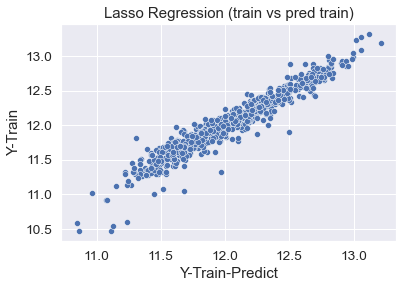

In [93]:
sns.scatterplot(y = y_train , x = y_pred_train_lasso)
plt.ylabel("Y-Train")
plt.xlabel("Y-Train-Predict")
plt.title("Lasso Regression (train vs pred train)")
plt.show()

### Insights:
    - lasso regression results shows how variables are distributed linearly without any outliers

### Lasso with best alpha feature coefficient values in descending order

In [94]:
lasso_beta = pd.DataFrame(index=X_train.columns)
lasso_beta.rows = X_train.columns
lasso_beta["Lasso with the best parameter"] = abs(lasso.coef_)

In [95]:
pd.set_option('display.max_rows', None)
lasso_beta = lasso_beta.sort_values(by = 'Lasso with the best parameter', ascending=False)
lasso_beta

,Lasso with the best parameter
GrLivArea,0.180887
OverallQual,0.123968
New,0.118411
Crawfor,0.093696
BuiltAge,0.091550
FV,0.074616
Y,0.071087
RL,0.065920
Normal,0.060335
BrkFace,0.057807


In [96]:
len(lasso_beta[lasso_beta["Lasso with the best parameter"]==0])

122

# Changes after Regularization

In [97]:
# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)',
                       'MSE (Train)'], 
            'Linear Regression': metric_lr
           }
lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression'] )

rg_metric = pd.Series(metric2, name = 'Ridge Regression')
ls_metric = pd.Series(metric3, name = 'Lasso Regression')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)

final_metric

,Metric,Linear Regression,Ridge Regression,Lasso Regression
0,R2 Score (Train),0.943870,0.932515,0.925505
1,MSE (Train),0.092837,0.101796,0.106952


# Changes in coeffiecients after Regularization

In [98]:
betas = pd.DataFrame(index=X_train.columns)

In [99]:
betas.rows = X_train.columns

In [100]:
betas['Linear Regression'] = lr.coef_
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_

In [101]:
pd.set_option('display.max_rows', None)
betas

,Linear Regression,Ridge,Lasso
MSSubClass,-3.501197e-04,-0.002747,-0.002332
LotFrontage,8.935629e-03,0.009920,0.010712
LotArea,6.041025e-03,0.005808,0.006288
OverallQual,8.634675e-02,0.108570,0.123968
OverallCond,3.692046e-02,0.045771,0.049090
MasVnrArea,1.220264e-03,0.003059,0.000836
BsmtFinSF1,4.069459e-02,0.041852,0.056627
BsmtFinSF2,5.269232e-05,0.000053,0.000041
BsmtUnfSF,-9.824317e-03,-0.008999,-0.000000
TotalBsmtSF,4.385369e-02,0.046332,0.041171
